<a href="https://colab.research.google.com/github/AbhiramRaja/Titanic-dataset-EDA/blob/main/Titanic_dataset_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

print(os.listdir(path))


['Titanic-Dataset.csv']


In [4]:
df = pd.read_csv(f"{path}/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
print(f"Age:\n{df.Age} \n\n\n, Cabin:\n{df.Cabin}\n\n\n , Embarked:\n{df.Embarked}\n\n\n")

Age:
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64 


, Cabin:
0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object


 , Embarked:
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object





In [9]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.isna().sum()

/tmp/ipython-input-2099476027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(), inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df.Cabin.isnull().sum() #out of 891 entries, 687 are null, so droping the column

np.int64(687)

In [11]:
df.drop("Cabin", axis=1, inplace=True)

In [12]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.isna().sum()

/tmp/ipython-input-4126405221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [28]:
df.Sex.unique() , df.Pclass.unique()

(array([0, 1]), array([3, 1, 2]))

In [14]:
df['Sex'] = df['Sex'].map({'male': 0,'female' :1})
df.Sex.unique()

array([0, 1])

In [15]:
#droping name, ticket and passengetId as they are irrelavent feature for the prediction model
df.drop(columns=["Name"], inplace=True)
df.drop(columns=["Ticket"],inplace=True)
df.drop(columns=["PassengerId"], inplace=True)

df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [16]:
#combining Siblings and spouses aboard and Parents and children aboard -> similar features
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
#so the SibSp n Parch make no sense now, so dropping them
df.drop(columns=["SibSp", "Parch"], inplace=True)

In [17]:
df['IsAlone'] = df['FamilySize'].map(lambda x: 1 if x == 1 else 0)

In [18]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [19]:
#converting the char to num by using one-hot encodin
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

In [20]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   FamilySize  891 non-null    int64  
 6   IsAlone     891 non-null    int64  
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


The above info shows all the columns dtype is either int64, float64 or bool which can be used for model. We have also removed all the unnecessary columns. Now lets analyse the data

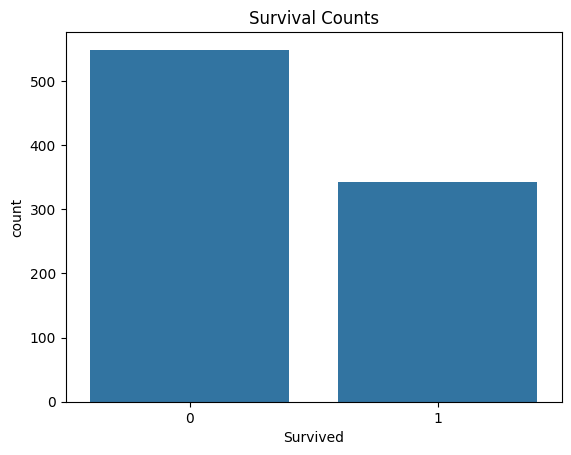

In [22]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.show()

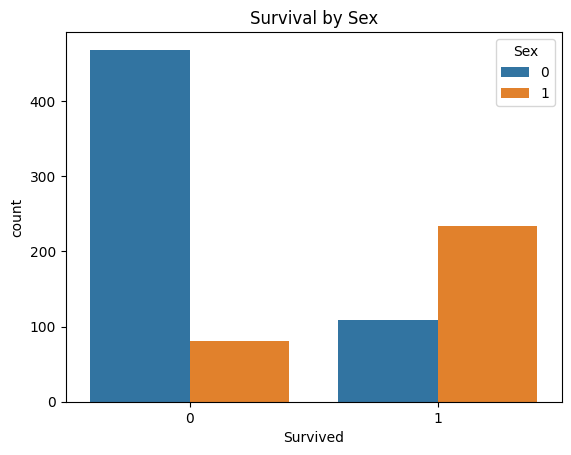

In [23]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.show()

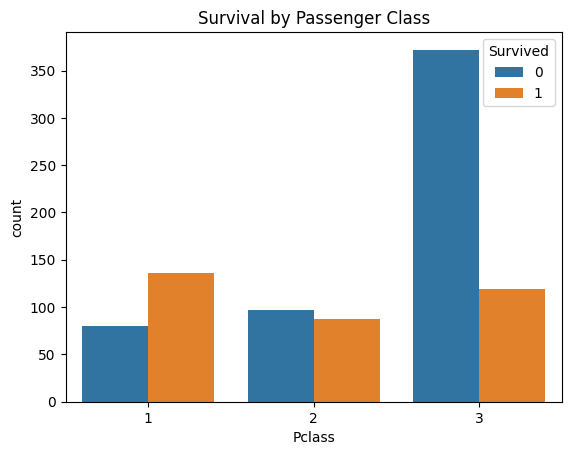

In [26]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

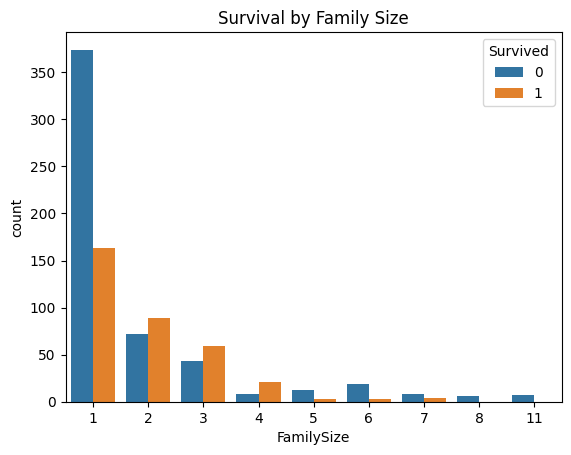

In [27]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.show()

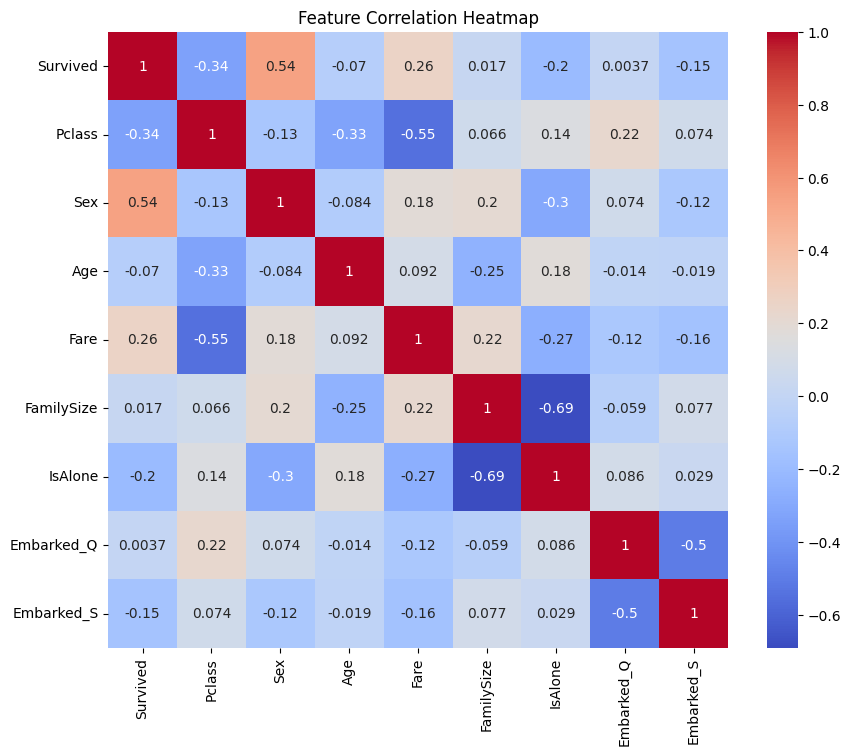

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

The above correlation Heatmap shows which features highly inflence the other. Our main goal is checking correlation wrt Survived.

This marks the end of the EDA (or) Data-Preprocessing